In [3]:
import pandas as pd
import matplotlib as plt
from plotnine import *


In [4]:
!pip install --upgrade zeroconf==0.19.1

Requirement already up-to-date: zeroconf==0.19.1 in c:\users\lunar\anaconda3\lib\site-packages (0.19.1)


In [5]:

df = pd.read_csv('year_pop.csv', encoding = 'utf-8')
df = df.copy()
df.head()
df = df.drop(columns = 'Unnamed: 0',axis=1)

df.columns



Index(['동이름', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [6]:



columns = df.columns

def str_to_int(x):
    try:
        return int(x)
    except:
        return x

for column in columns : 
        df[column] = df[column].apply(lambda x:str_to_int(x))




In [7]:
df['동이름'] =df['동이름'].astype(str)


In [8]:
df.head()

,동이름,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,합계,"10,456,034","10,464,051","10,575,447","10,528,774","10,442,426","10,388,055","10,369,593","10,297,138","10,204,057","10,124,579"
1,사직동,"10,451","10,464","10,668","10,602","10,477","10,327","10,132","10,033","10,013","9,717"
2,삼청동,"3,801","3,717","3,706","3,590","3,485","3,367","3,268","3,174","3,118","3,097"
3,부암동,"11,933","11,602","11,648","11,596","11,478","11,469","11,356","11,217","11,044","10,726"
4,평창동,"19,757","19,780","19,921","19,996","19,816","19,779","19,595","19,414","19,457","19,163"


In [9]:
sample = df[df['동이름'].str.contains('연남|익선|성수|봉천|망원|신사|삼청|명동|상도|목동|신정|상계', regex=True)]
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053 entries, 2 to 1391
Data columns (total 11 columns):
동이름     1053 non-null object
2008    1053 non-null object
2009    1053 non-null object
2010    1053 non-null object
2011    1053 non-null object
2012    1053 non-null object
2013    1053 non-null object
2014    1053 non-null object
2015    1053 non-null object
2016    1053 non-null object
2017    1053 non-null object
dtypes: object(11)
memory usage: 98.7+ KB


## 선그래프그리기 

In [10]:
sample2 = df[df['동이름'].str.contains('합계|신정1동|상도1동|상도2동|신정2동',regex = True)]

sample2 = pd.melt(sample2, id_vars=['동이름'],value_vars=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'])
sample2.head()

,동이름,variable,value
0,합계,2008,"10,456,034"
1,신정1동,2008,"25,627"
2,신정2동,2008,"23,446"
3,상도1동,2008,"40,003"
4,상도2동,2008,"25,910"


C:\Users\lunar\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\lunar\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\lunar\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


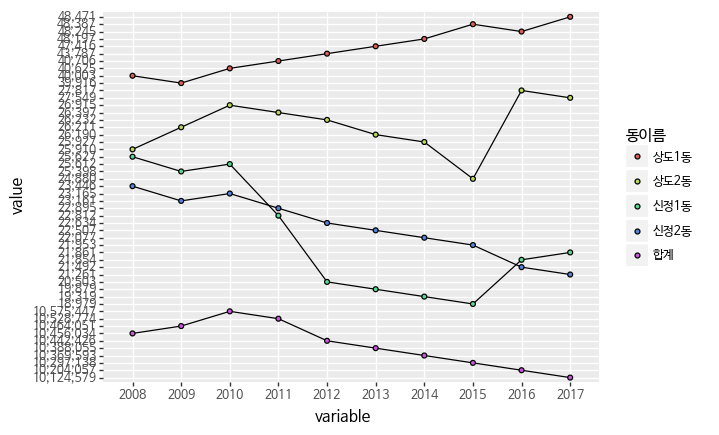

<ggplot: (-9223371995345955503)>

In [11]:
(ggplot(sample2, aes(x='variable', y='value',group='동이름' ,fill='동이름'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)


## 증감률 그래프그리기

In [12]:
before_seoul = df.drop('동이름', axis = 1)
before_seoul.drop('2017', axis =1, inplace=True)
before_seoul.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"10,456,034","10,464,051","10,575,447","10,528,774","10,442,426","10,388,055","10,369,593","10,297,138","10,204,057"
1,"10,451","10,464","10,668","10,602","10,477","10,327","10,132","10,033","10,013"
2,"3,801","3,717","3,706","3,590","3,485","3,367","3,268","3,174","3,118"
3,"11,933","11,602","11,648","11,596","11,478","11,469","11,356","11,217","11,044"
4,"19,757","19,780","19,921","19,996","19,816","19,779","19,595","19,414","19,457"


In [13]:
after_seoul = df.drop('동이름', axis=1)
after_seoul.drop('2008', axis=1, inplace=True)
after_seoul.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"10,464,051","10,575,447","10,528,774","10,442,426","10,388,055","10,369,593","10,297,138","10,204,057","10,124,579"
1,"10,464","10,668","10,602","10,477","10,327","10,132","10,033","10,013","9,717"
2,"3,717","3,706","3,590","3,485","3,367","3,268","3,174","3,118","3,097"
3,"11,602","11,648","11,596","11,478","11,469","11,356","11,217","11,044","10,726"
4,"19,780","19,921","19,996","19,816","19,779","19,595","19,414","19,457","19,163"


In [14]:
import numpy as np

In [15]:

seoul_pops_rate = pd.DataFrame(np.round((after_seoul.values - before_seoul.values) * 100 / before_seoul.values, 3))
col_list = [str(num)+'~'+str(num+1) for num in range(2008, 2017)]
seoul_pops_rate.columns = col_list
final_rate = pd.DataFrame()
final_rate['동이름'] = df['동이름'].copy(deep=True)
final_rate = final_rate.join(seoul_pops_rate)
final_rate.head()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [295]:
final_rate.to_csv('a_percentage_change_pops.csv', index=False)

In [1]:
sample_rate = final_rate[final_rate['동이름'].str.contains('합계|신정1동|상도1동|상도2동|신정2동',regex = True)]

NameError: name 'final_rate' is not defined

In [2]:
sample_rate.columns


NameError: name 'sample_rate' is not defined

In [304]:
sample_rate = pd.melt(sample_rate, id_vars=['동이름'], value_vars=['동이름', '2008~2009', '2009~2010', '2010~2011', '2011~2012', '2012~2013',
       '2013~2014', '2014~2015', '2015~2016', '2016~2017'])

Exception: Data must be 1-dimensional

In [298]:
(ggplot(sample_rate, aes(x='variable', y='value',group='동이름' ,fill='동이름'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)


,동이름,2008~2009,2009~2010,2010~2011,2011~2012,2012~2013,2013~2014,2014~2015,2015~2016,2016~2017
0,합계,0.077,1.065,-0.441,-0.820,-0.521,-0.178,-0.699,-0.904,-0.779
245,신정1동,-0.894,0.843,-10.932,-10.122,-3.043,-2.817,-1.760,15.148,0.032
246,신정2동,-1.216,0.017,-1.166,-1.140,-0.561,-1.911,-0.562,-2.100,-1.075
316,상도1동,-0.217,1.776,0.199,7.569,8.288,1.647,0.394,-0.293,0.468
317,상도2동,1.162,2.686,-1.925,-0.625,-0.160,-1.004,-4.038,11.805,-0.963
